In [1]:
import tensorflow as tf
import PIL
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

In [6]:
train_data.shape

(42000, 785)

In [7]:
train_data["label"]

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
labels = train_data.iloc[:,0]



In [9]:
train_data = train_data/255  # preprocessing
test_data = test_data/255

In [10]:
X = train_data.iloc[:,1:]
X_train, X_val, y_train, y_val = train_test_split(X, labels, test_size=0.2, random_state=40)

In [11]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from tensorflow.keras import regularizers



model = keras.Sequential([keras.layers.Dense(128,input_shape=(784,), activation="relu"), # input later
                          keras.layers.Dense(128, activation="sigmoid", kernel_regularizer=regularizers.L2(0.0001),
),
                          
                          keras.layers.Dense(10, activation="sigmoid")# hidden
                        ])



In [47]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[callback])

Epoch 1/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.3928 - accuracy: 0.8993
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1717 - accuracy: 0.9547
Epoch 3/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1254 - accuracy: 0.9686
Epoch 4/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0984 - accuracy: 0.9763
Epoch 5/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0812 - accuracy: 0.9815
Epoch 6/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0662 - accuracy: 0.9858
Epoch 7/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0550 - accuracy: 0.9891
Epoch 8/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0478 - accuracy: 0.9910
Epoch 9/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0399 - accuracy: 0.9934
Epoch 10/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.036

In [48]:
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=1)
print("Test accuracy", test_acc)

263/263 [==============================] - 1s 2ms/step - loss: 0.1149 - accuracy: 0.9693
Test accuracy 0.9692857265472412


In [20]:
predictions = model.predict(X_val)

263/263 [==============================] - 2s 5ms/step


In [21]:
predictions

array([[1.0000000e+00, 4.2859287e-07, 2.6257440e-02, ..., 8.7449362e-06,
        1.5973650e-06, 1.4221622e-04],
       [9.4326824e-04, 4.4840692e-07, 1.0000000e+00, ..., 1.3940538e-04,
        9.5684761e-08, 2.6584297e-11],
       [8.1858978e-08, 1.0000000e+00, 3.5595198e-07, ..., 5.8562006e-03,
        7.5681889e-03, 3.2782583e-09],
       ...,
       [3.4975109e-09, 3.7373485e-07, 4.2998485e-07, ..., 1.0481791e-11,
        6.0550444e-04, 8.7137450e-05],
       [3.4477383e-02, 9.1521304e-07, 8.0130185e-06, ..., 1.1688834e-09,
        5.7173493e-06, 1.9774104e-06],
       [2.8838263e-08, 9.0573230e-05, 8.3157013e-04, ..., 8.9564162e-01,
        2.2391205e-06, 6.9572061e-04]], dtype=float32)

In [49]:
predictions_new = []
for pred in predictions:
  predictions_new.append(pred.argmax())


In [50]:
len(predictions_new)

8400

In [24]:
cm = tf.math.confusion_matrix(labels=y_val,predictions=predictions_new)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[809,   0,   3,   0,   0,   1,   3,   0,   2,   3],
       [  0, 886,   2,   0,   1,   1,   1,   4,   4,   0],
       [  2,   3, 839,   2,   4,   0,   0,   3,   4,   1],
       [  0,   2,   6, 883,   0,   8,   1,   6,   6,   1],
       [  1,   0,   1,   0, 770,   1,   3,   2,   2,  11],
       [  2,   1,   0,  13,   1, 736,   4,   0,   2,   3],
       [  2,   0,   0,   0,   3,   2, 801,   0,   0,   0],
       [  0,   1,   3,   2,   1,   1,   0, 863,   3,   6],
       [  1,   3,   0,   3,   3,   3,   3,   1, 767,   5],
       [  6,   1,   0,   5,   6,   6,   0,   7,   3, 845]], dtype=int32)>

Text(69.0, 0.5, 'True value')

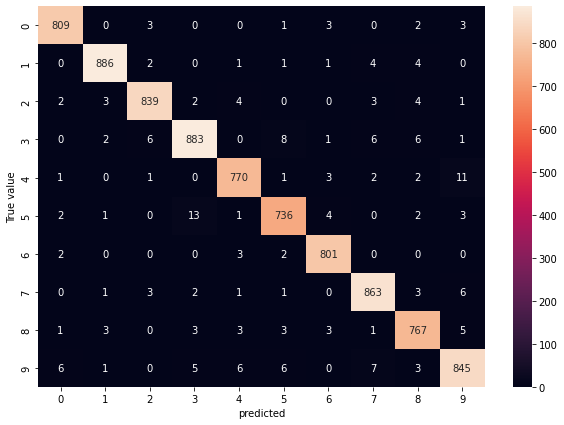

In [25]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("True value")